In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('pg_details.csv')

In [3]:
df

,PG_ID,PG_Name,Location,Rent,Amenities,Contact_Number,Ratings,Reviews,Gender,Nearby_places
0,1,Green Nest PG,Koramangala,8500,"WiFi, AC, Food",9876543210,4.5,120,Boys,Near Forum Mall
1,2,Blue Stay PG,Whitefield,7500,"WiFi, Laundry",9876543211,4.2,85,Co-living,Near ITPL
2,3,Cozy Nest PG,Marathahalli,9000,"WiFi, AC, Food, Laundry",9876543212,4.8,200,Boys,Near Innovative Multiplex
3,4,Urban Hive PG,Electronic City,7000,WiFi,9876543213,3.9,60,Co-living,Near Wipro Gate
4,5,Royal Comfort PG,Indiranagar,9500,"WiFi, AC, Food",9876543214,4.7,150,Boys,Near Metro Station
...,...,...,...,...,...,...,...,...,...,...
580,581,Pearl Residency,MG Road,9100,"WiFi, AC, Food",9876544113,4.5,190,Girls,Adjacent to Brigade Road
581,582,Ivy Haven,Domlur,7900,"WiFi, Food, AC",9876544114,3.9,125,Girls,Near EGL Business Park
582,583,Garnet Residency,Wilson Garden,7300,"WiFi, Laundry",9876544120,3.2,80,Girls,Near NIMHANS Hospital
583,584,Magnolia Comfort,Banashankari,7800,"WiFi, Food, AC",9876544121,4.1,145,Girls,Close to BDA Complex


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 585 entries, 0 to 584
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   PG_ID           585 non-null    int64  
 1   PG_Name         585 non-null    object 
 2   Location        585 non-null    object 
 3   Rent            585 non-null    int64  
 4   Amenities       585 non-null    object 
 5   Contact_Number  585 non-null    int64  
 6   Ratings         585 non-null    float64
 7   Reviews         585 non-null    int64  
 8   Gender          585 non-null    object 
 9   Nearby_places   585 non-null    object 
dtypes: float64(1), int64(4), object(5)
memory usage: 45.8+ KB


In [5]:
# check the missing values
df.isnull().sum()

PG_ID             0
PG_Name           0
Location          0
Rent              0
Amenities         0
Contact_Number    0
Ratings           0
Reviews           0
Gender            0
Nearby_places     0
dtype: int64

In [6]:
# Convert Rent column to numeric (if needed)

df["Rent"] = pd.to_numeric(df["Rent"], errors='coerce')

In [7]:
df

,PG_ID,PG_Name,Location,Rent,Amenities,Contact_Number,Ratings,Reviews,Gender,Nearby_places
0,1,Green Nest PG,Koramangala,8500,"WiFi, AC, Food",9876543210,4.5,120,Boys,Near Forum Mall
1,2,Blue Stay PG,Whitefield,7500,"WiFi, Laundry",9876543211,4.2,85,Co-living,Near ITPL
2,3,Cozy Nest PG,Marathahalli,9000,"WiFi, AC, Food, Laundry",9876543212,4.8,200,Boys,Near Innovative Multiplex
3,4,Urban Hive PG,Electronic City,7000,WiFi,9876543213,3.9,60,Co-living,Near Wipro Gate
4,5,Royal Comfort PG,Indiranagar,9500,"WiFi, AC, Food",9876543214,4.7,150,Boys,Near Metro Station
...,...,...,...,...,...,...,...,...,...,...
580,581,Pearl Residency,MG Road,9100,"WiFi, AC, Food",9876544113,4.5,190,Girls,Adjacent to Brigade Road
581,582,Ivy Haven,Domlur,7900,"WiFi, Food, AC",9876544114,3.9,125,Girls,Near EGL Business Park
582,583,Garnet Residency,Wilson Garden,7300,"WiFi, Laundry",9876544120,3.2,80,Girls,Near NIMHANS Hospital
583,584,Magnolia Comfort,Banashankari,7800,"WiFi, Food, AC",9876544121,4.1,145,Girls,Close to BDA Complex


In [8]:
df.describe()

,PG_ID,Rent,Contact_Number,Ratings,Reviews
count,585.00000,585.000000,5.850000e+02,585.000000,585.000000
mean,293.00000,8250.427350,9.876544e+09,4.109231,109.391453
std,169.01923,1140.072091,2.846934e+02,0.777256,35.552088
min,1.00000,4500.000000,9.876543e+09,1.500000,15.000000
25%,147.00000,7600.000000,9.876543e+09,4.000000,88.000000
50%,293.00000,8500.000000,9.876544e+09,4.300000,110.000000
75%,439.00000,9100.000000,9.876544e+09,4.600000,135.000000
max,585.00000,10200.000000,9.876544e+09,4.900000,210.000000


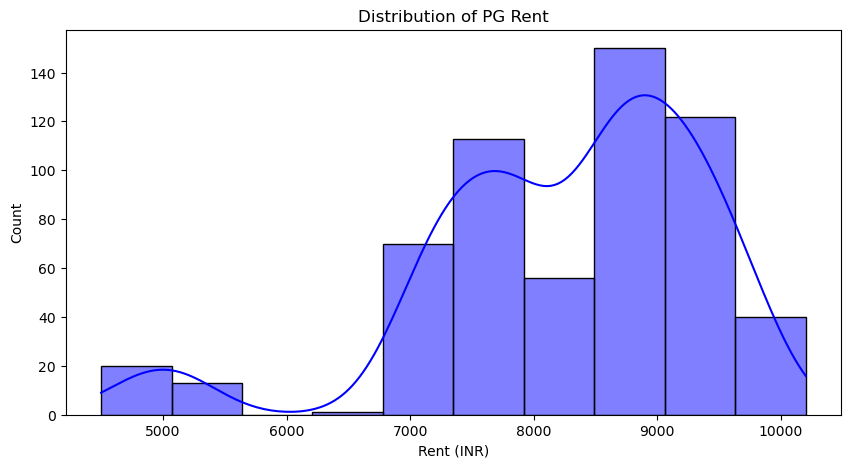

In [9]:
# REnt distributution

plt.figure(figsize=(10,5))
sns.histplot(df['Rent'],bins=10,kde=True,color='blue')
plt.title('Distribution of PG Rent')
plt.xlabel('Rent (INR)')
plt.ylabel('Count')
plt.show()

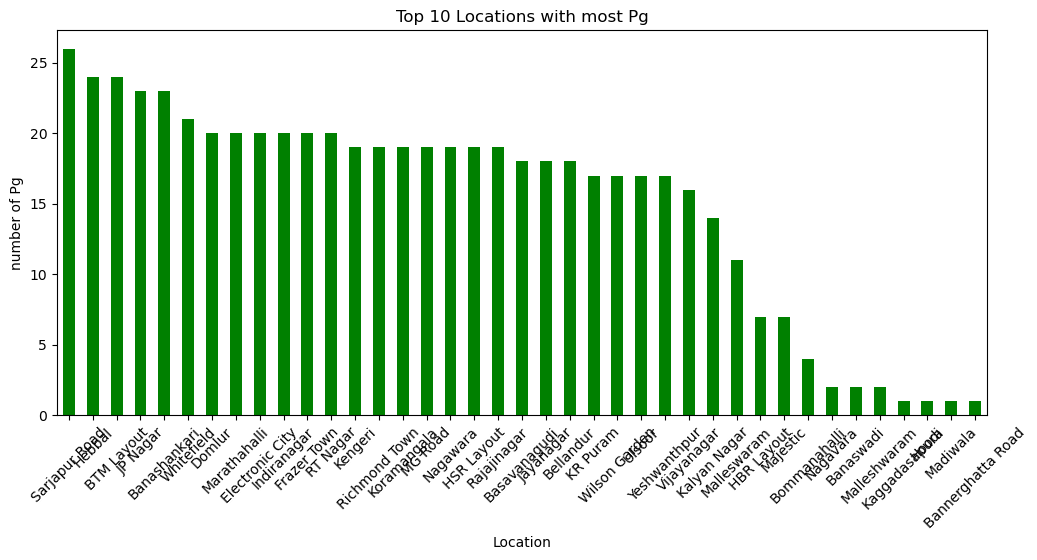

In [10]:
# Top locations by number of PG's

plt.figure(figsize=(12,5))
df['Location'].value_counts().plot(kind='bar',color='green')
plt.title('Top 10 Locations with most Pg')
plt.xlabel('Location')
plt.ylabel('number of Pg')
plt.xticks(rotation=45)
plt.show()

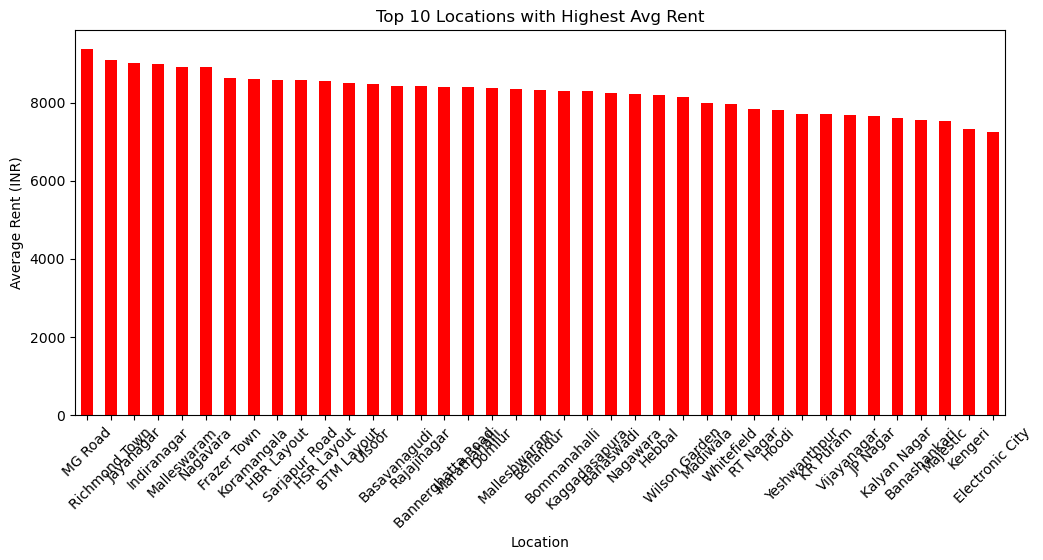

In [12]:
# Average rent for location

avg_rent = df.groupby('Location')['Rent'].mean().sort_values(ascending=False)
plt.figure(figsize=(12, 5))
avg_rent.plot(kind='bar', color='red')
plt.title("Top 10 Locations with Highest Avg Rent")
plt.xlabel("Location")
plt.ylabel("Average Rent (INR)")
plt.xticks(rotation=45)
plt.show()


In [14]:
# Top rated PG 

top_pg = df[df['Ratings']>4.5][['PG_Name','Location','Rent','Ratings']]
print("\nTop-rated PG")
print(top_pg.sort_values(by='Ratings',ascending=False))


Top-rated PG
                PG_Name       Location  Rent  Ratings
293  Tranquil Residency  Richmond Town  9800      4.9
448          Begonia PG    Rajajinagar  9600      4.9
184          Diamond PG    Indiranagar  9800      4.9
373     Platinum Living    Indiranagar  9700      4.9
392       Maple Leaf PG     BTM Layout  9700      4.9
..                  ...            ...   ...      ...
201       Crystal Haven    Malleswaram  9400      4.6
369          Skyline PG     BTM Layout  8700      4.6
363          Urban Stay     HSR Layout  8900      4.6
208          Skyline PG      Jayanagar  9100      4.6
584       Platinum Stay       KR Puram  9000      4.6

[180 rows x 4 columns]


In [15]:
# Common amenities analysis

def count_amenities(amenities_list):
    all_amenities=[]
    for amenities in amenities_list:
        all_amenities.extend(amenities.split(", "))
    return pd.Series(all_amenities).value_counts()

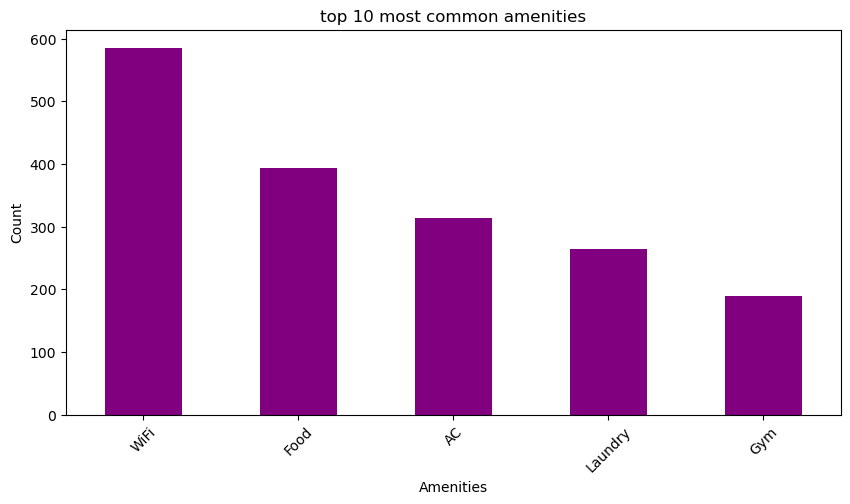

In [16]:
amenity_counts = count_amenities(df['Amenities'])
plt.figure(figsize=(10,5))
amenity_counts.plot(kind='bar',color='purple')
plt.title('top 10 most common amenities')
plt.xlabel('Amenities')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

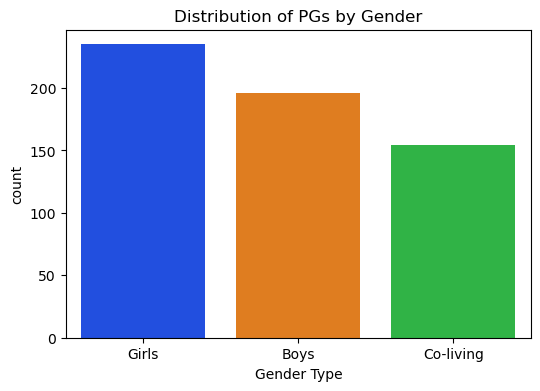

In [20]:
gender_count=df['Gender'].value_counts()
plt.figure(figsize=(6,4))
sns.barplot(x=gender_count.index, y=gender_count.values,palette='bright')
plt.title('Distribution of PGs by Gender')
plt.xlabel('Gender Type')
plt.ylabel('count')
plt.show()

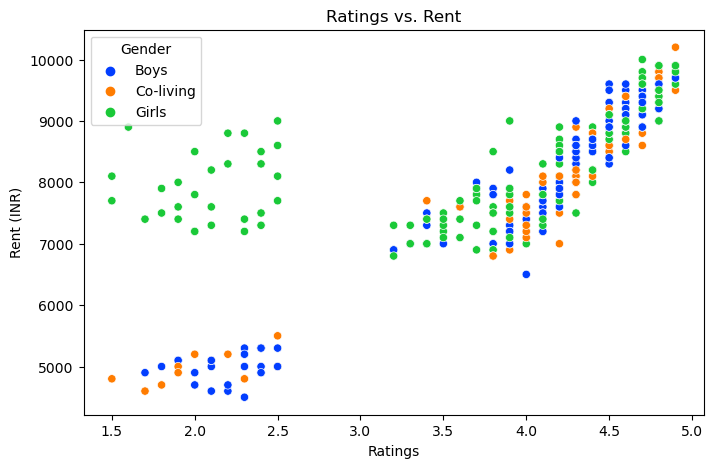

In [22]:
# Ratings vs. Rent

plt.figure(figsize=(8,5))
sns.scatterplot(x=df["Ratings"], y=df["Rent"], hue=df["Gender"], palette='bright')
plt.title("Ratings vs. Rent")
plt.xlabel("Ratings")
plt.ylabel("Rent (INR)")
plt.show()

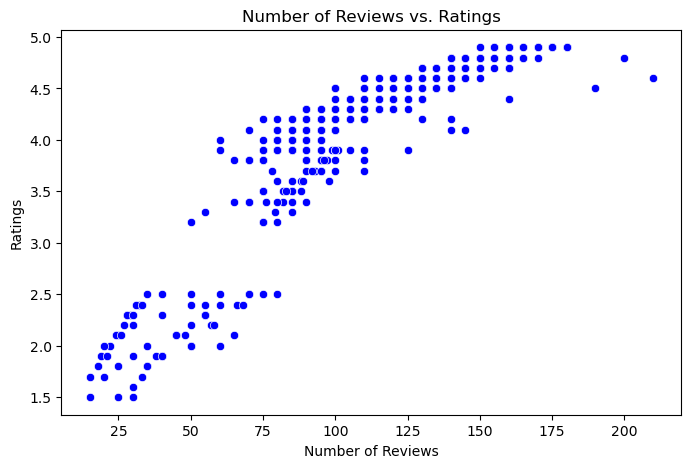

In [24]:
# Reviews vs. Ratings

plt.figure(figsize=(8,5))
sns.scatterplot(x=df["Reviews"], y=df["Ratings"], color='blue')
plt.title("Number of Reviews vs. Ratings")
plt.xlabel("Number of Reviews")
plt.ylabel("Ratings")
plt.show()

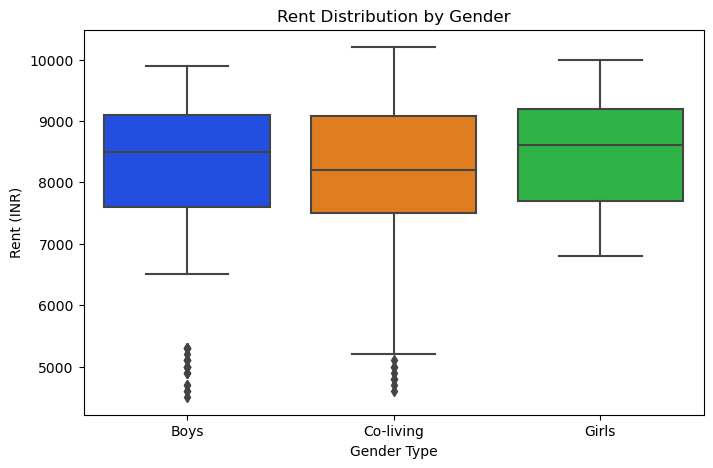

In [26]:
# Boxplot of Rent by Gender

plt.figure(figsize=(8,5))
sns.boxplot(x=df["Gender"], y=df["Rent"], palette='bright')
plt.title("Rent Distribution by Gender")
plt.xlabel("Gender Type")
plt.ylabel("Rent (INR)")
plt.show()


# Model Building

## Linear Regression

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [28]:
# Convert categorical variables to numerical (One-Hot Encoding)

df = pd.get_dummies(df, columns=['Location', 'Gender'], drop_first=True)

In [29]:
df

,PG_ID,PG_Name,Rent,Amenities,Contact_Number,Ratings,Reviews,Nearby_places,Location_Banashankari,Location_Banaswadi,...,Location_Rajajinagar,Location_Richmond Town,Location_Sarjapur Road,Location_Ulsoor,Location_Vijayanagar,Location_Whitefield,Location_Wilson Garden,Location_Yeshwanthpur,Gender_Co-living,Gender_Girls
0,1,Green Nest PG,8500,"WiFi, AC, Food",9876543210,4.5,120,Near Forum Mall,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2,Blue Stay PG,7500,"WiFi, Laundry",9876543211,4.2,85,Near ITPL,False,False,...,False,False,False,False,False,True,False,False,True,False
2,3,Cozy Nest PG,9000,"WiFi, AC, Food, Laundry",9876543212,4.8,200,Near Innovative Multiplex,False,False,...,False,False,False,False,False,False,False,False,False,False
3,4,Urban Hive PG,7000,WiFi,9876543213,3.9,60,Near Wipro Gate,False,False,...,False,False,False,False,False,False,False,False,True,False
4,5,Royal Comfort PG,9500,"WiFi, AC, Food",9876543214,4.7,150,Near Metro Station,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
580,581,Pearl Residency,9100,"WiFi, AC, Food",9876544113,4.5,190,Adjacent to Brigade Road,False,False,...,False,False,False,False,False,False,False,False,False,True
581,582,Ivy Haven,7900,"WiFi, Food, AC",9876544114,3.9,125,Near EGL Business Park,False,False,...,False,False,False,False,False,False,False,False,False,True
582,583,Garnet Residency,7300,"WiFi, Laundry",9876544120,3.2,80,Near NIMHANS Hospital,False,False,...,False,False,False,False,False,False,True,False,False,True
583,584,Magnolia Comfort,7800,"WiFi, Food, AC",9876544121,4.1,145,Close to BDA Complex,True,False,...,False,False,False,False,False,False,False,False,False,True


In [30]:
# Selecting features and target variable

x=df.drop(columns=['PG_ID','PG_Name','Contact_Number','Amenities','Nearby_places','Rent'])
y=df['Rent']

In [31]:
x

,Ratings,Reviews,Location_Banashankari,Location_Banaswadi,Location_Bannerghatta Road,Location_Basavanagudi,Location_Bellandur,Location_Bommanahalli,Location_Domlur,Location_Electronic City,...,Location_Rajajinagar,Location_Richmond Town,Location_Sarjapur Road,Location_Ulsoor,Location_Vijayanagar,Location_Whitefield,Location_Wilson Garden,Location_Yeshwanthpur,Gender_Co-living,Gender_Girls
0,4.5,120,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,4.2,85,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,True,False
2,4.8,200,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,3.9,60,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,True,False
4,4.7,150,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
580,4.5,190,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
581,3.9,125,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,True
582,3.2,80,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,True
583,4.1,145,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [32]:
y

0      8500
1      7500
2      9000
3      7000
4      9500
       ... 
580    9100
581    7900
582    7300
583    7800
584    9000
Name: Rent, Length: 585, dtype: int64

In [33]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [34]:
x_train

,Ratings,Reviews,Location_Banashankari,Location_Banaswadi,Location_Bannerghatta Road,Location_Basavanagudi,Location_Bellandur,Location_Bommanahalli,Location_Domlur,Location_Electronic City,...,Location_Rajajinagar,Location_Richmond Town,Location_Sarjapur Road,Location_Ulsoor,Location_Vijayanagar,Location_Whitefield,Location_Wilson Garden,Location_Yeshwanthpur,Gender_Co-living,Gender_Girls
77,4.1,90,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,True,False
436,4.4,130,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
211,4.3,100,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
192,4.6,140,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,True,False
450,4.4,120,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,4.3,120,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
106,4.3,100,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
270,4.5,110,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,True,False
435,4.8,165,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [35]:
x_test

,Ratings,Reviews,Location_Banashankari,Location_Banaswadi,Location_Bannerghatta Road,Location_Basavanagudi,Location_Bellandur,Location_Bommanahalli,Location_Domlur,Location_Electronic City,...,Location_Rajajinagar,Location_Richmond Town,Location_Sarjapur Road,Location_Ulsoor,Location_Vijayanagar,Location_Whitefield,Location_Wilson Garden,Location_Yeshwanthpur,Gender_Co-living,Gender_Girls
383,4.8,155,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
422,1.8,25,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
90,4.5,120,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
472,3.6,80,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
523,4.4,110,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,4.4,115,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
561,2.5,40,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
167,4.5,130,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
560,1.9,38,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [36]:
y_train

77     7200
436    8700
211    8300
192    9000
450    8700
       ... 
71     8900
106    8200
270    8500
435    9500
102    8100
Name: Rent, Length: 468, dtype: int64

In [37]:
y_test

383    9200
422    4700
90     8300
472    7600
523    8700
       ... 
296    8500
561    5000
167    8700
560    7400
362    9400
Name: Rent, Length: 117, dtype: int64

In [38]:
# Trian the Linear Regression model

model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [40]:
y_pred=model.predict(x_test)
y_pred

array([ 9613.69712757,  5760.90909055,  8548.44508337,  7477.5792878 ,
        8261.74201984,  9547.79834438,  9244.09601044,  8996.60294845,
        8481.31416517,  7819.26120661,  6937.12046204,  9246.99310227,
        7578.00453428,  9637.96055738,  8601.83370016,  8219.92916011,
        8823.83875077,  9832.86958342,  9021.84575505,  8383.48823718,
        9388.42259994,  8380.79784674, 10540.0460501 ,  6377.47209932,
        8366.14051339,  7535.19467334,  7305.87330098, 10667.91462564,
        8435.79640411,  6854.76722661,  7920.05266937,  6845.42893236,
        7305.87330098,  9248.12774745,  8452.54265187,  9201.50414305,
        7815.171272  ,  7810.38530632,  8801.38207785,  6036.38689939,
        8515.50622147,  9389.24402774,  7962.65974472,  7969.72321378,
        9159.49671858,  8289.79112646,  8283.64715538,  6731.27714354,
        8806.42119643,  7465.69284806,  8392.29630281,  8859.21990761,
        8606.29073773,  9559.98612229,  7955.21103259,  8778.38064322,
      

In [46]:
 # Model evalution 

mae=mean_absolute_error(y_test,y_pred)
print(f"Mean Absolute Error: {mae}")

Mean Absolute Error: 371.0552792635307


In [47]:
mse=mean_squared_error(y_test,y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 303644.46139603364


In [48]:
r2=r2_score(y_test,y_pred)
print(f"R2 Score: {r2}")

R2 Score: 0.7854595072435709


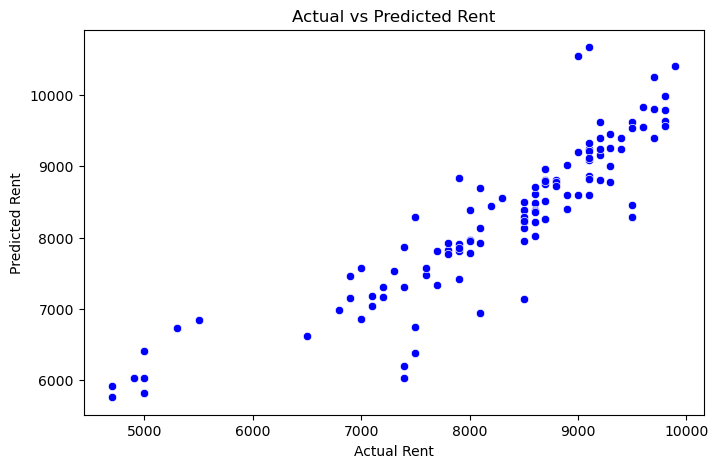

In [49]:
# Scatter plot of actual vs predicted rent

plt.figure(figsize=(8,5))
sns.scatterplot(x=y_test, y=y_pred, color='blue')
plt.xlabel("Actual Rent")
plt.ylabel("Predicted Rent")
plt.title("Actual vs Predicted Rent")
plt.show()

## Random Forest

In [50]:
from sklearn.ensemble import RandomForestRegressor

In [53]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(x_train, y_train)

RandomForestRegressor(random_state=42)

In [54]:
rf_pred=rf_model.predict(x_test)
rf_pred

array([9568.        , 4833.        , 8599.71666667, 7235.        ,
       8439.9547619 , 9834.        , 9057.41666667, 9230.66666667,
       8418.58571429, 7854.93333333, 8140.        , 9086.5       ,
       7064.        , 9828.        , 8936.        , 8500.23333333,
       9001.5       , 9386.83333333, 8256.16666667, 8224.63333333,
       9590.16666667, 8489.55      , 9849.        , 7874.        ,
       8495.13333333, 7515.1       , 7406.45238095, 8910.1       ,
       7799.        , 6973.84285714, 7885.        , 7773.        ,
       7406.45238095, 9302.83333333, 8997.        , 9319.        ,
       7484.91666667, 7869.23333333, 8777.25      , 5338.        ,
       8579.13333333, 9707.5       , 8003.        , 7598.93333333,
       9340.        , 8299.1       , 8699.8       , 7450.        ,
       8639.33333333, 7117.        , 8383.93333333, 8857.84047619,
       8347.8       , 9838.9       , 8240.4       , 8723.66666667,
       5092.        , 9080.        , 9940.        , 7629.16666

In [55]:
rf_mae=mean_absolute_error(y_test,rf_pred)
print(f"Mean Absolute Error: {rf_mae}")

Mean Absolute Error: 242.8343304843305


In [56]:
rf_mse = mean_squared_error(y_test, rf_pred)
print(f"Mean Squared Error: {rf_mse}")

Mean Squared Error: 162267.50625671068


In [57]:
rf_r2 = r2_score(y_test, rf_pred)
print(f"R2 Score: {rf_r2}")

R2 Score: 0.8853496270255816


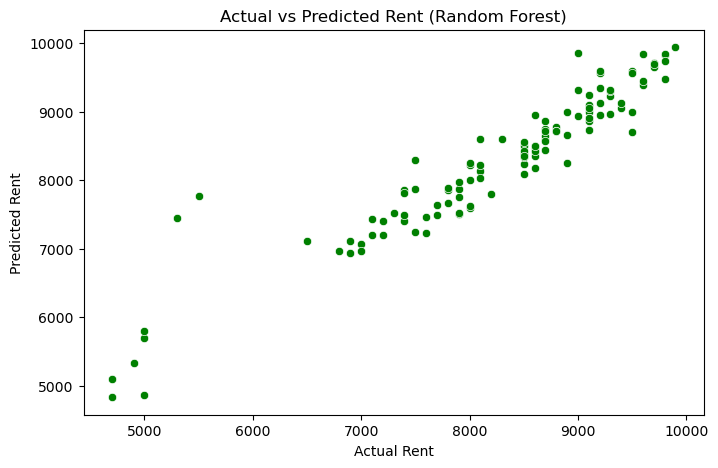

In [58]:
# Scatter plot of actual vs predicted rent for Random Forest

plt.figure(figsize=(8,5))
sns.scatterplot(x=y_test, y=rf_pred, color='green')
plt.xlabel("Actual Rent")
plt.ylabel("Predicted Rent")
plt.title("Actual vs Predicted Rent (Random Forest)")
plt.show()

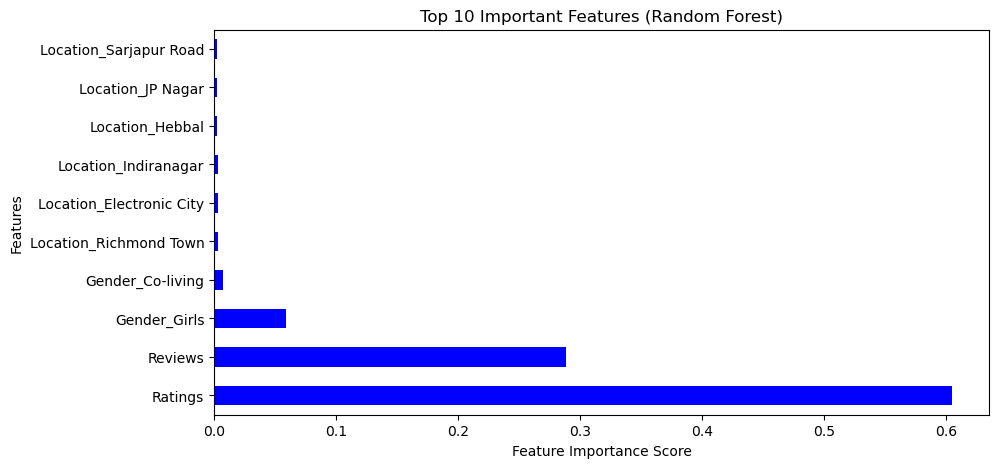

In [70]:
feature_importances = pd.Series(rf_model.feature_importances_, index=x.columns)
plt.figure(figsize=(10,5))
feature_importances.nlargest(10).plot(kind='barh', color='blue')
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Top 10 Important Features (Random Forest)")
plt.show()

# Decision Tree

In [71]:
from sklearn.tree import DecisionTreeRegressor, export_text, export_graphviz

In [72]:
dt_model=DecisionTreeRegressor(random_state=42)
dt_model.fit(x_train,y_train)

DecisionTreeRegressor(random_state=42)

In [73]:
dt_pred=dt_model.predict(x_test)
dt_pred

array([ 9700.        ,  4600.        ,  8500.        ,  7300.        ,
        8200.        ,  9900.        ,  9100.        ,  9300.        ,
        8000.        ,  7800.        ,  8600.        ,  8800.        ,
        7000.        ,  9900.        ,  8900.        ,  8550.        ,
        9000.        ,  9500.        ,  8500.        ,  8100.        ,
        9400.        ,  8500.        , 10200.        ,  7900.        ,
        8500.        ,  7200.        ,  7500.        ,  8900.        ,
        7800.        ,  6900.        ,  7900.        ,  8600.        ,
        7500.        ,  9250.        ,  9300.        ,  9300.        ,
        7500.        ,  7700.        ,  8700.        ,  5300.        ,
        8600.        ,  9700.        ,  8100.        ,  7600.        ,
        9400.        ,  8300.        ,  8500.        ,  8800.        ,
        8700.        ,  7000.        ,  8000.        ,  8866.66666667,
        8700.        ,  9850.        ,  8300.        ,  8700.        ,
      

In [74]:
dt_mae=mean_absolute_error(y_test,dt_pred)
print(f"Mean Absolute Error :{dt_mae}")

Mean Absolute Error :283.61823361823366


In [75]:
dt_mse = mean_squared_error(y_test, dt_pred)
print(f"Mean Squared Error: {dt_mse}")

Mean Squared Error: 329546.5337132004


In [76]:
dt_r2 = r2_score(y_test, dt_pred)
print(f"R2 Score: {dt_r2}")

R2 Score: 0.7671583555189896


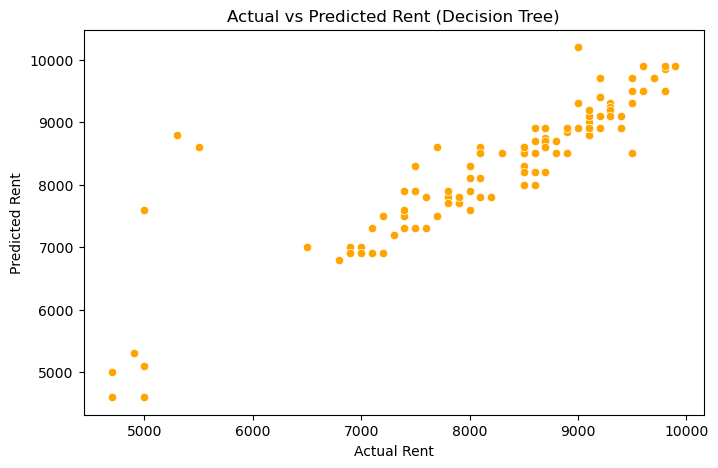

In [77]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=y_test, y=dt_pred, color='orange')
plt.xlabel("Actual Rent")
plt.ylabel("Predicted Rent")
plt.title("Actual vs Predicted Rent (Decision Tree)")
plt.show()


In [83]:
pip install graphviz


DEPRECATION: textract 1.6.5 has a non-standard dependency specifier extract-msg<=0.29.*. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of textract or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063



  Obtaining dependency information for graphviz from https://files.pythonhosted.org/packages/00/be/d59db2d1d52697c6adc9eacaf50e8965b6345cc143f671e1ed068818d5cf/graphviz-0.20.3-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/47.1 kB ? eta -:--:--
   ---------------------------------- ----- 41.0/47.1 kB 653.6 kB/s eta 0:00:01
   ---------------------------------------- 47.1/47.1 kB 784.8 kB/s eta 0:00:00


In [86]:
import graphviz

In [91]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

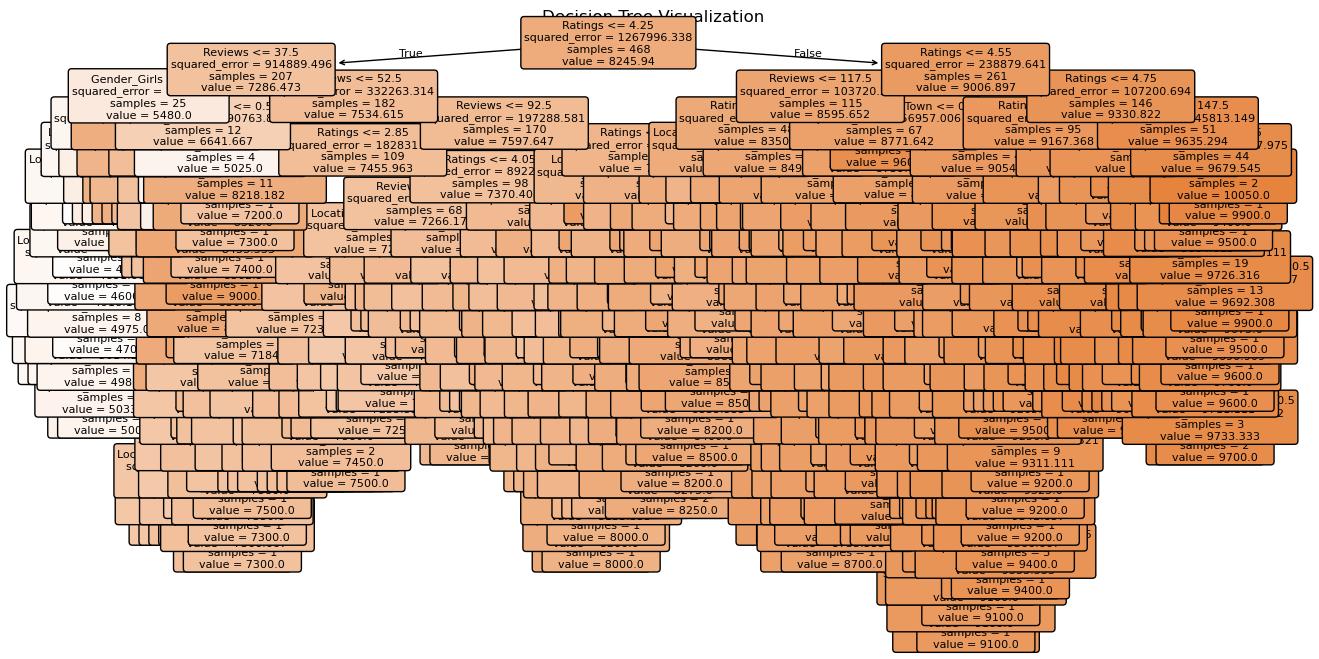

In [92]:
# Plot the Decision Tree
plt.figure(figsize=(15, 8))
plot_tree(dt_model, feature_names=x.columns, filled=True, rounded=True, fontsize=8)
plt.title("Decision Tree Visualization")
plt.show()


In [93]:
from sklearn.tree import DecisionTreeClassifier, export_text, export_graphviz
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [97]:
dt_model1 = DecisionTreeClassifier(random_state=42)
dt_model1.fit(x_train, y_train)

DecisionTreeClassifier(random_state=42)

In [98]:
dt_pred = dt_model1.predict(x_test)

In [99]:
dt_acc = accuracy_score(y_test, dt_pred)
print(f"Accuracy: {dt_acc}")

Accuracy: 0.21367521367521367


In [101]:
dt_report = classification_report(y_test, dt_pred)
print("Classification Report:\n", dt_report)

Classification Report:
               precision    recall  f1-score   support

        4600       0.00      0.00      0.00         0
        4700       0.00      0.00      0.00         2
        4900       0.00      0.00      0.00         1
        5000       0.00      0.00      0.00         3
        5300       0.00      0.00      0.00         1
        5500       0.00      0.00      0.00         1
        6500       0.00      0.00      0.00         1
        6800       1.00      1.00      1.00         1
        6900       0.67      1.00      0.80         2
        7000       0.50      0.50      0.50         2
        7100       0.00      0.00      0.00         2
        7200       0.00      0.00      0.00         2
        7300       0.00      0.00      0.00         1
        7400       0.00      0.00      0.00         4
        7500       0.00      0.00      0.00         3
        7600       0.00      0.00      0.00         2
        7700       0.00      0.00      0.00         2
   

C:\Users\91805\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\91805\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\91805\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\91805\anaconda3\Lib\site-packages\sklea

In [102]:
dt_cm = confusion_matrix(y_test, dt_pred)
print("Confusion Matrix:\n", dt_cm)

Confusion Matrix:
 [[0 0 0 ... 0 0 0]
 [1 0 1 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 3 0 0]
 [0 0 0 ... 0 2 1]
 [0 0 0 ... 0 0 1]]


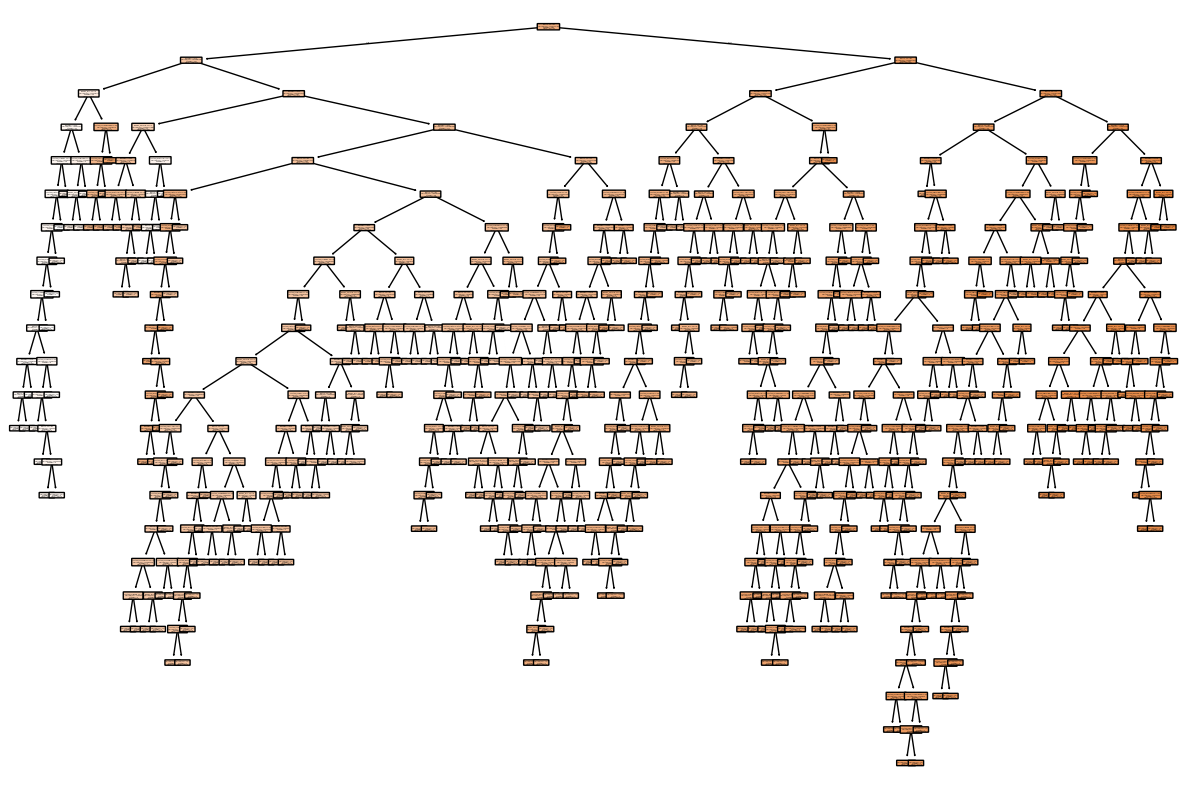

In [107]:
from sklearn.tree import plot_tree

plt.figure(figsize=(15,10))
plot_tree(dt_model, feature_names=x.columns, class_names=['Low Rent', 'High Rent'], filled=True, rounded=True)
plt.show()
